# Self Organizing Maps - SOM
## Data Clustering: Votes of MPs

In [261]:
import numpy as np

In [262]:
data = np.genfromtxt('data_lab2/votes.dat',
                     dtype=int,
                     delimiter=',')
data = data.reshape((349,31))
data.shape

(349, 31)

In [263]:
def descending_logarithmic(x, n, init):
    A = init
    k = -np.log(0.03) / (n-3)   # Calcola k in modo che y sia 1 quando x è 16
    B = 0  # Per ottenere y = 1 quando x è 16
    return A * np.exp(-k * x) + B

In [264]:
import math

class SOM:
    def __init__(self, output_shape, data_dimensionality, step_size, neighborhood_size):
        self.output_shape = output_shape        # (10,10)
        self.weight_matrix = np.random.random((output_shape[0], output_shape[1], data_dimensionality))
        # self.weight_matrix = np.ones((output_shape, data_dimensionality))
        self.step_size = step_size
        self.neighborhood_size = neighborhood_size

    def find_winner(self, sample):
        distances = []
        for row in range(self.weight_matrix.shape[0]):
            for column in range(self.weight_matrix.shape[1]):
                # print(self.weight_matrix[row,column])
                d = np.linalg.norm(sample - self.weight_matrix[row,column])
                distances.append(((row, column), d))
                # print("{}: {}".format((row, column), d))
        
        sorted_distances = sorted(distances, key=lambda x: x[1])

        winner = sorted_distances[0]
        # print("winner is: {}".format(winner))
        return winner[0]

    def manhattan(self, x1, x2):
        # print(x1, x2)
        return abs(x1[0]-x2[0])+(abs(x1[1]-x2[1]))
        # return np.linalg.norm()

    def get_neighborhood(self, winner):
        neighborhood = []
        for row in range(self.weight_matrix.shape[0]):
            for column in range(self.weight_matrix.shape[1]):
                if (self.manhattan((row, column), winner) <= self.neighborhood_size):
                    neighborhood.append((row, column))

        return neighborhood
    
    def update_weights(self, neighborhood, sample):
        for row in range(self.weight_matrix.shape[0]):
            for column in range(self.weight_matrix.shape[1]):
                if (row, column) in neighborhood:
                    # print("{} is in neighbors".format(row))
                    # print("old row{}: {}".format(row, self.weight_matrix[row]))
                    new_dim = self.weight_matrix[row, column] + (sample - self.weight_matrix[row, column]) * self.step_size
                    self.weight_matrix[row, column] = new_dim
                    # print("new_row {}: {}".format(row, new_row))

    def fit(self, X, n_epochs):
        t1 = int(n_epochs/3)
        t2 = int(2*n_epochs/3)
        initial = self.neighborhood_size


        for e in range(n_epochs):
            y = descending_logarithmic(e, n_epochs, initial)

            if (y>0):
                self.neighborhood_size = math.floor(y)
            else:
                self.neighborhood_size = 0

            print("{}: {}".format(e, self.neighborhood_size))

            for row in range(X.shape[0]):
                winner = self.find_winner(X[row])
                neighborhood = self.get_neighborhood(winner)

                self.update_weights(neighborhood, X[row])

In [265]:
som = SOM((10, 10), 31, 0.2, 20)

In [266]:
som.weight_matrix.shape

(10, 10, 31)

In [267]:
w = som.find_winner(data[56])
w

(9, 0)

In [268]:
n = som.get_neighborhood(w)
n

[(0, 0),
 (0, 1),
 (0, 2),
 (0, 3),
 (0, 4),
 (0, 5),
 (0, 6),
 (0, 7),
 (0, 8),
 (0, 9),
 (1, 0),
 (1, 1),
 (1, 2),
 (1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (2, 0),
 (2, 1),
 (2, 2),
 (2, 3),
 (2, 4),
 (2, 5),
 (2, 6),
 (2, 7),
 (2, 8),
 (2, 9),
 (3, 0),
 (3, 1),
 (3, 2),
 (3, 3),
 (3, 4),
 (3, 5),
 (3, 6),
 (3, 7),
 (3, 8),
 (3, 9),
 (4, 0),
 (4, 1),
 (4, 2),
 (4, 3),
 (4, 4),
 (4, 5),
 (4, 6),
 (4, 7),
 (4, 8),
 (4, 9),
 (5, 0),
 (5, 1),
 (5, 2),
 (5, 3),
 (5, 4),
 (5, 5),
 (5, 6),
 (5, 7),
 (5, 8),
 (5, 9),
 (6, 0),
 (6, 1),
 (6, 2),
 (6, 3),
 (6, 4),
 (6, 5),
 (6, 6),
 (6, 7),
 (6, 8),
 (6, 9),
 (7, 0),
 (7, 1),
 (7, 2),
 (7, 3),
 (7, 4),
 (7, 5),
 (7, 6),
 (7, 7),
 (7, 8),
 (7, 9),
 (8, 0),
 (8, 1),
 (8, 2),
 (8, 3),
 (8, 4),
 (8, 5),
 (8, 6),
 (8, 7),
 (8, 8),
 (8, 9),
 (9, 0),
 (9, 1),
 (9, 2),
 (9, 3),
 (9, 4),
 (9, 5),
 (9, 6),
 (9, 7),
 (9, 8),
 (9, 9)]

In [269]:
som.update_weights(n, data[0])

In [270]:
som.fit(data, 50)

0: 20
1: 18
2: 17
3: 15
4: 14
5: 13


6: 12
7: 11
8: 11
9: 10
10: 9
11: 8
12: 8
13: 7
14: 7
15: 6
16: 6
17: 5
18: 5
19: 4
20: 4
21: 4
22: 3
23: 3
24: 3
25: 3
26: 2
27: 2
28: 2
29: 2
30: 2
31: 1
32: 1
33: 1
34: 1
35: 1
36: 1
37: 1
38: 1
39: 1
40: 1
41: 0
42: 0
43: 0
44: 0
45: 0
46: 0
47: 0
48: 0
49: 0


In [271]:
winnrz = []
xs = []
ys = []

for row in range(data.shape[0]):
    # samples.append(row)
    xs.append(som.find_winner(data[row])[0])
    ys.append(som.find_winner(data[row])[1])

    winnrz.append( (som.find_winner(data[row])) )

xs = np.array(xs)
ys = np.array(ys)
# winnrz = np.array(winnrz)


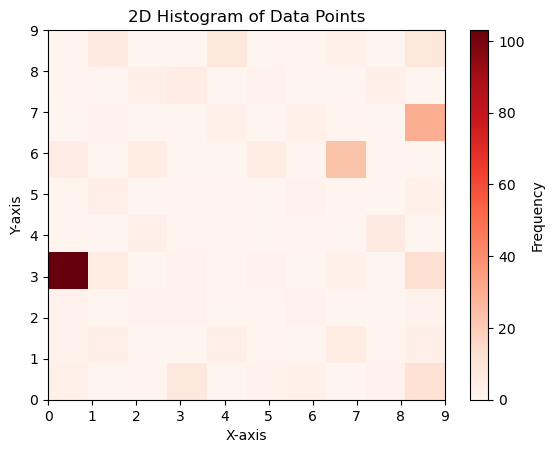

In [272]:
import matplotlib.pyplot as plt

plt.hist2d(xs, ys, bins=(10, 10), cmap='Reds')
plt.colorbar(label='Frequency')

plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('2D Histogram of Data Points')

# Show the plot
plt.show()


-----------

## Plotting by party

In [273]:
# Coding: 0=no party, 1='m', 2='fp', 3='s', 4='v', 5='mp', 6='kd', 7='c'
# Use some color scheme for these different groups

In [274]:
parties = [1,2,1,1,3,1,4,3,5,2,6,3,3,1,4,6,4,2,3,2,3,1,3,1,3,2,3,2,5,3,2,3,0,3,6,1,6,1,1,2,3,3,3,3,3,3,1,6,1,3,3,1,2,5,4,3,1,2,2,4,7,2,1,1,5,2,2,3,1,4,7,3,1,3,3,6,5,3,2,2,1,3,3,3,3,6,3,5,4,2,7,1,3,4,3,3,5,6,7,1,3,6,1,2,3,3,3,2,1,6,6,3,3,4,3,7,3,6,3,1,2,1,7,3,3,3,6,2,7,6,3,1,4,3,3,3,2,3,3,3,3,1,6,2,3,3,3,3,3,4,3,1,2,1,3,6,1,3,3,4,3,2,2,1,3,3,3,3,2,4,3,1,1,6,1,2,5,7,1,6,3,4,3,2,3,7,1,3,3,3,3,3,3,2,4,6,2,1,7,1,3,2,4,3,2,3,1,1,4,6,1,5,6,3,3,3,2,2,3,4,1,1,3,6,7,3,2,5,2,3,3,3,5,3,1,6,3,4,2,3,7,3,3,3,2,6,1,7,3,7,6,4,3,3,3,2,1,3,3,4,3,7,2,6,1,5,3,3,3,3,3,1,4,5,2,7,3,6,3,3,3,2,1,3,3,3,7,4,6,3,3,1,2,7,5,3,3,4,6,3,3,1,3,4,7,3,3,6,5,3,2,3,3,3,3,3,7,4,6,2,1,3,3,3,1,4,7,3,3,3,4,2,3,6,1,5,3,7,3,3,3,4,5,6,3,3,3,1,2,]

In [275]:
parties = np.array(parties)

In [276]:
n_party = 4

In [277]:
mask = parties == n_party
print(np.sum(mask))

29


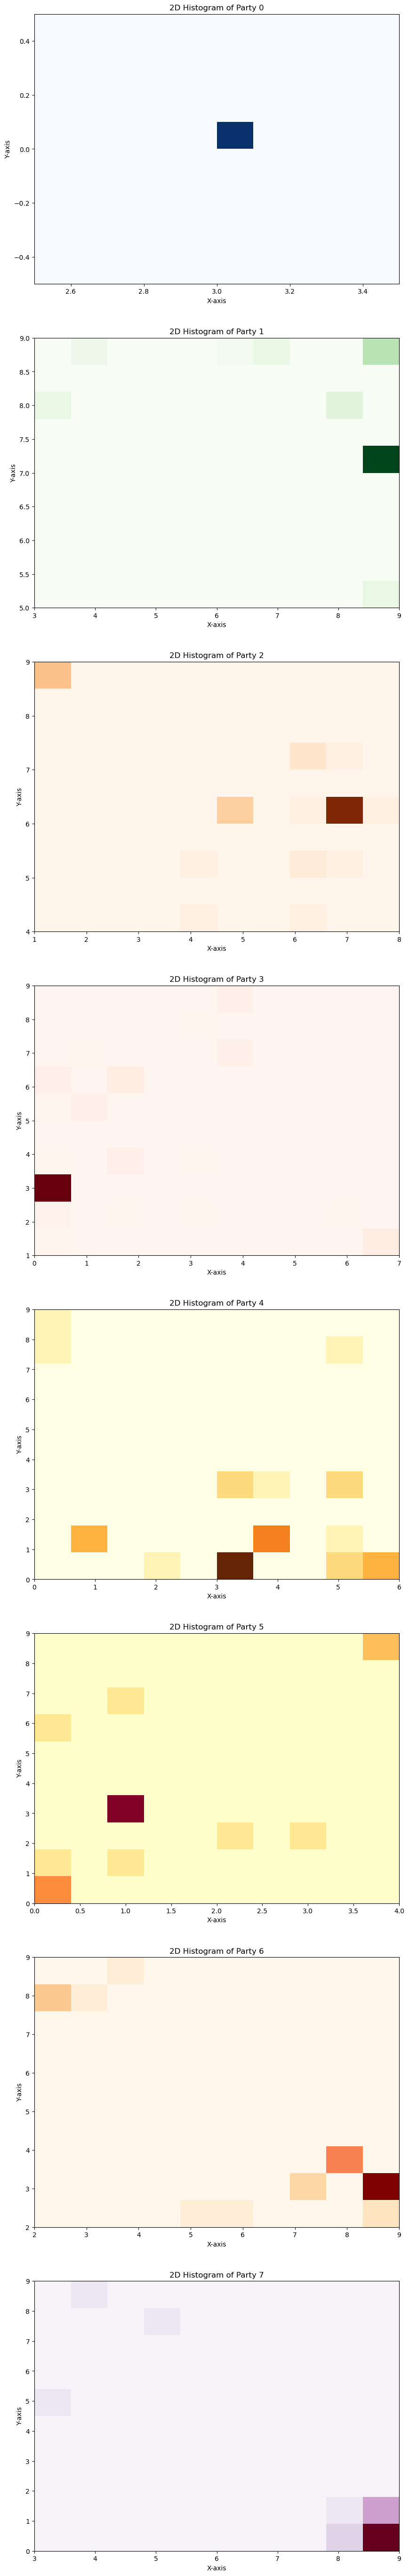

In [278]:
fig, axes = plt.subplots(8, 1, figsize=(10, 70))  # 7 rows, 1 column

colors = ['Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']

for n_party in range(0,8):
    mask = parties == n_party
    # print(mask)

    axes[n_party].hist2d(xs[mask], ys[mask], bins=(10, 10), cmap=colors[n_party])
    # axes[n_party].colorbar(label='Frequency')

    axes[n_party].set_xlabel('X-axis')
    axes[n_party].set_ylabel('Y-axis')
    axes[n_party].set_title('2D Histogram of Party {}'.format(n_party))

# Show the plot
plt.show()


-----------

## Plotting by gender

In [279]:
# Coding: Male 0, Female 1

In [280]:
genders = 0,0,0,0,1,1,1,1,1,0,0,0,0,1,0,1,0,1,0,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,1,1,1,1,0,1,1,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,0,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,1,1,1,0,0,1,1,0,0,1,1,0,0,1,0,1,1,0,1,0,1,1,0,0,0,1,1,1,1,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,1,0,0,1,1,0,0,0,0,1,1,1,0,1,1,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,1,0,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,1,1,0,1,1,0,1,0,1,1,0,1,0,1,1,1,0,1,0,0,1,1,1,0,0,0,1,0,0,1,0,1,0,1,0,1,1,1,1,0,0,0,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,1,1,1,0,1,1,0,1,0,0,0,1,0,1,0,1,1,0,0,1,0,1,1,1,0,1,0,1,1,1,0,0,1,1,1,0,1,

In [281]:
genders = np.array(genders)

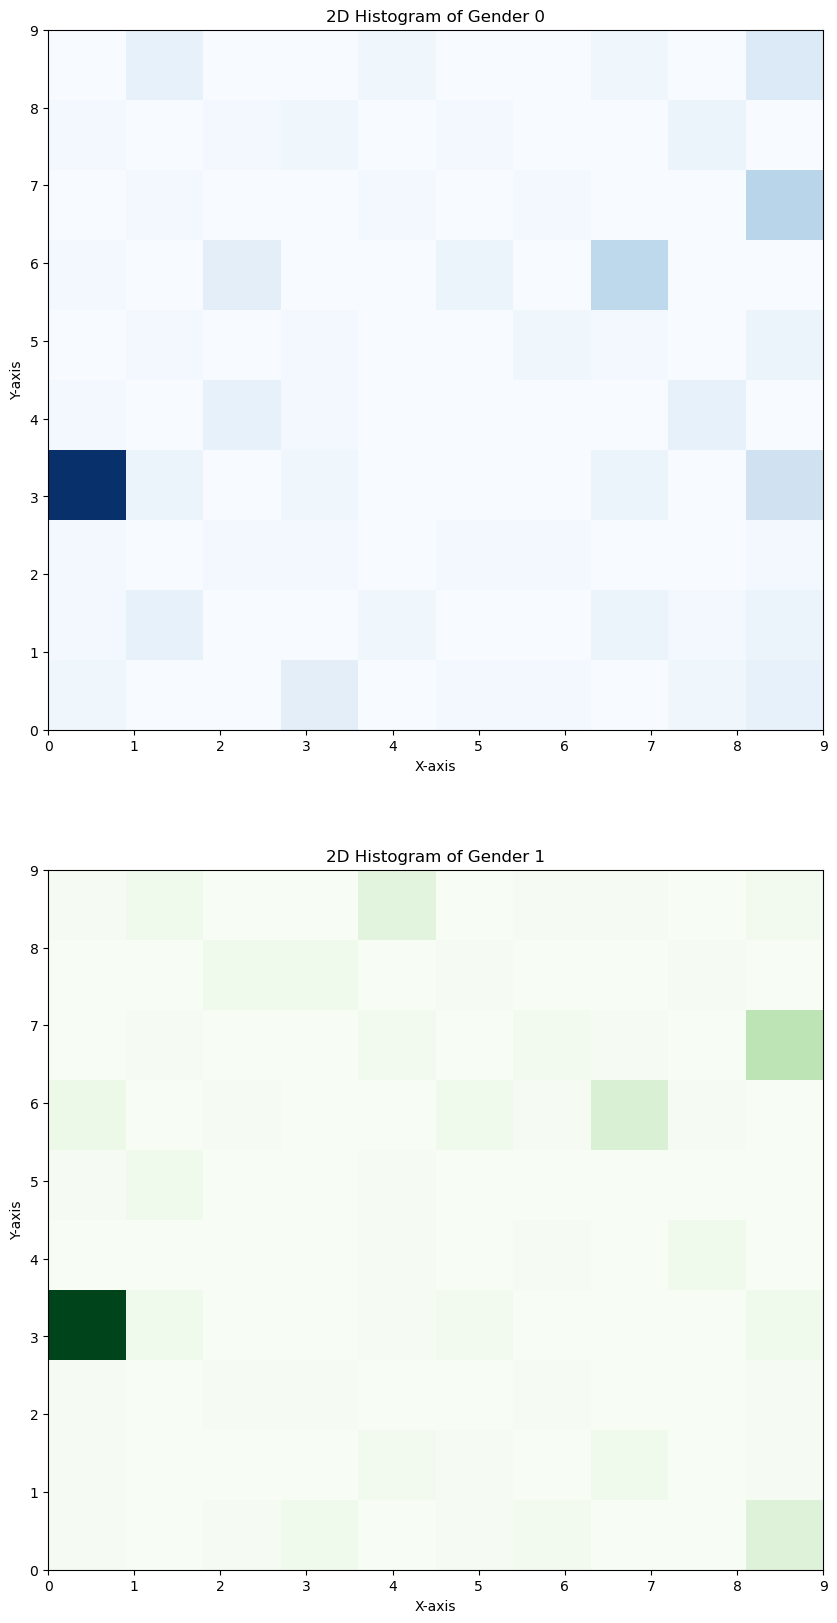

In [282]:
fig, axes = plt.subplots(2, 1, figsize=(10, 20))  # 7 rows, 1 column

colors = ['Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']

for g in range(0,2):
    mask = genders == g
    # print(mask)

    axes[g].hist2d(xs[mask], ys[mask], bins=(10, 10), cmap=colors[g])
    # axes[n_party].colorbar(label='Frequency')

    axes[g].set_xlabel('X-axis')
    axes[g].set_ylabel('Y-axis')
    axes[g].set_title('2D Histogram of Gender {}'.format(g))

# Show the plot
plt.show()


---------

## Plotting by district

In [283]:
districts = np.array([1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,3,3,3,3,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,6,6,6,6,6,6,6,6,6,6,6,6,6,7,7,7,7,7,7,7,8,8,8,8,8,8,8,8,8,9,9,10,10,10,10,10,10,11,11,11,11,11,11,11,11,11,12,12,12,12,12,12,12,12,12,12,13,13,13,13,13,13,13,13,13,13,13,13,13,13,14,14,14,14,14,14,14,14,14,14,14,15,15,15,15,15,15,15,15,15,15,15,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,17,17,17,17,17,17,17,17,17,17,17,17,17,18,18,18,18,18,18,18,18,18,18,19,19,19,19,19,19,19,20,20,20,20,20,20,20,20,20,21,21,21,21,21,21,21,21,21,21,21,22,22,22,22,22,22,22,22,22,22,22,23,23,23,23,23,23,23,23,23,23,24,24,24,24,24,24,24,24,24,24,24,25,25,25,25,25,25,25,25,25,25,25,26,26,26,26,26,26,26,26,26,26,27,27,27,27,27,27,28,28,28,28,28,28,28,28,28,28,28,29,29,29,29,29,29,29,29,29,29,29,])

IndexError: index 15 is out of bounds for axis 0 with size 15

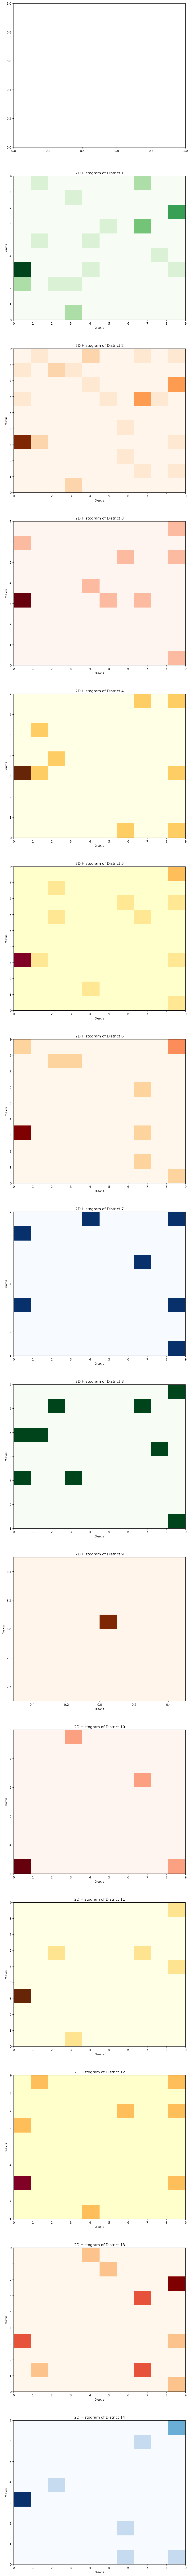

In [287]:
fig, axes = plt.subplots(15, 1, figsize=(10, 150))  # 7 rows, 1 column

colors = ['Blues', 'Greens', 'Oranges', 'Reds',
                      'YlOrBr', 'YlOrRd', 'OrRd', 'PuRd']

for d in range(1,16):
    mask = districts == d
    # print(mask)

    axes[d].hist2d(xs[mask], ys[mask], bins=(10, 10), cmap=colors[d%7])
    # axes[n_party].colorbar(label='Frequency')

    axes[d].set_xlabel('X-axis')
    axes[d].set_ylabel('Y-axis')
    axes[d].set_title('2D Histogram of District {}'.format(d))

# Show the plot
plt.show()
